In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

Creation d'un dataset avec sklearn

dimensions de x :  (100, 2)
dimensions de y :  (100, 1)


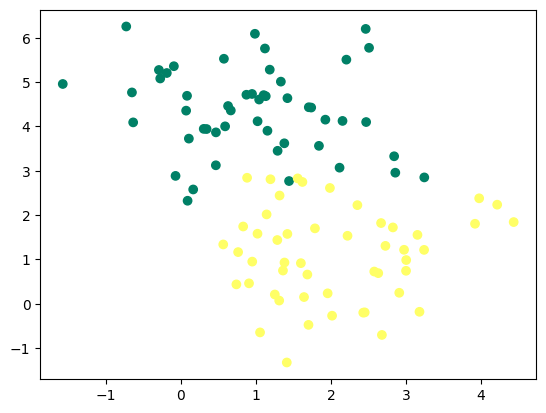

In [2]:
x,y = make_blobs(n_samples=100, n_features=2,centers=2, random_state=0)
y=y.reshape((y.shape[0],1))
print('dimensions de x : ',x.shape)
print('dimensions de y : ',y.shape)
plt.scatter(x[:,0],x[:,1],c=y, cmap='summer')
plt.show()

In [3]:
def initialisation(x):
    w=np.random.randn(x.shape[1],1)
    b=np.random.randn(1)
    return(w,b)

In [4]:
(w,b)=initialisation(x)
w.shape

(2, 1)

In [5]:
def model(x,w,b):
    z=x.dot(w)+b
    A=1/(1+np.exp(-z))
    return(A)

In [6]:
A=model(x,w,b)
A.shape

(100, 1)

In [7]:
def log_loss(A,y):
    return((1/100) * np.sum(-y * np.log(A)-(1-y) * np.log(1-A)))

In [8]:
log_loss(A,y)

3.297287515915303

In [9]:
def gradients(A,x,y):
    dw=(1/len(y))*np.dot(x.T,A-y)
    db=(1/len(y))*np.sum(A-y)
    return(dw,db)

In [10]:
(dw,db)=gradients(A,x,y)
db.shape

()

In [11]:
def update(dw,db,w,b,learning_rate):
    w=w-learning_rate*dw
    b=b-learning_rate*db
    return(w,b)

In [12]:
learning_rate=1
(w,b)=update(dw,db,w,b,learning_rate)
w.shape

(2, 1)

In [24]:
def predict(x,w,b):
    A=model(x,w,b)
    print(A)
    return A>=0.5
    

In [14]:
from sklearn.metrics import accuracy_score

In [18]:
def artificial_neuron(x,y,learning_rate = 0.1,n_iter=100):
    w,b=initialisation(x)
    loss=[]
    
    for i in range(n_iter):
        A=model(x,w,b)
        loss.append(log_loss(A,y))
        dw,db=gradients(A,x,y)
        w,b=update(dw,db,w,b,learning_rate)
        
    y_pred = predict(x,w,b)
    print(accuracy_score(y,y_pred))
    
    plt.plot(loss)
    plt.show()
    return (w,b)

0.9


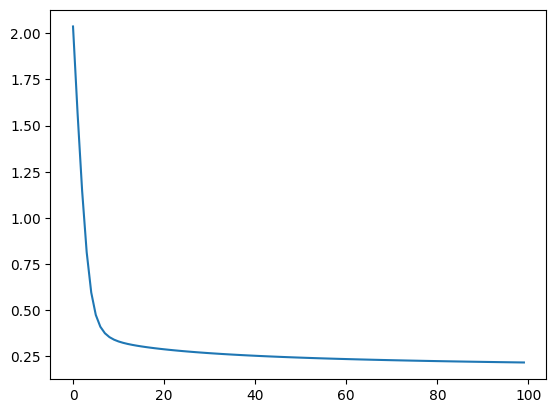

In [20]:
(w,b)= artificial_neuron(x,y,learning_rate = 0.1,n_iter=100)

In [21]:
w,b

(array([[ 1.06244959],
        [-1.10805583]]),
 array([0.98816883]))

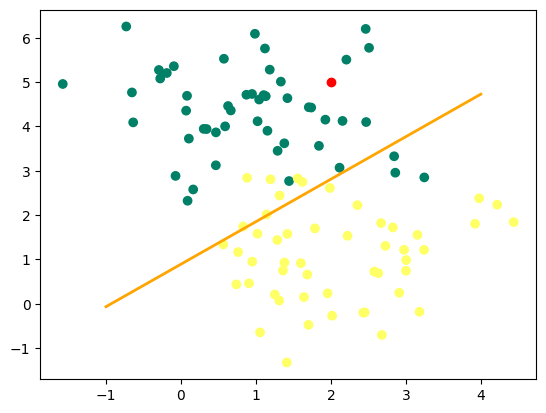

[0.08112111]


array([False])

In [30]:
# nouvelle donnée pour réaliser la prédiction 
new_plant=np.array([2,5])

#visualisation de la plante parmi les points initiales
plt.scatter(x[:,0],x[:,1],c=y, cmap='summer')
plt.scatter(new_plant[0],new_plant[1],c='r')

#tracage de la frontière de décision
x0=np.linspace(-1,4,100)
plt.plot(x0,(-w[0]*x0-b)/w[1],c='orange',lw=2)
plt.show()

#determination de la probabilité d'appartenance de la nouvelle plante à la région 1
predict(new_plant,w,b)